## Value the gap

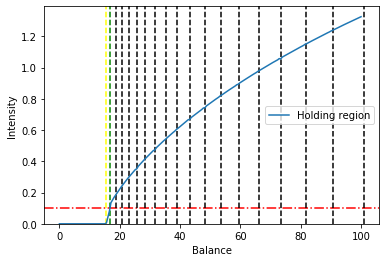

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from dcc import OAV, AAV, Parameters
PATH_TO_PICKLE = '/Users/mmark/Documents/credit_collections/credit_collections_rl/dcc/ref_parameters'
oc = OAV.load(PATH_TO_PICKLE)
fig = oc.plot_statespace()

In [ ]:
from sustained_ihp import SustainedIHP
from joblib import Parallel, delayed
lambda_hat = 0.11
starting_balance = 100
params = Parameters()
sihp = SustainedIHP(starting_balance, params)
sihp.logger.disabled = True

#approx_lstars = sihp.calculate_frontier()
mc = Parallel(n_jobs=10)(delayed(sihp.calculate_frontier)() for i in range(100))